In [1]:
import re
import csv
import pandas as pd
import matplotlib.pyplot as pltb
import itertools

In [2]:

import re
with open('./pubmed_heliconius_set.txt',"r", encoding='utf-8-sig') as f:
    my_text = f.read()
    my_text = re.sub(r'\n\s{6}', ' ', my_text)

In [3]:
 text1 = re.findall(r"\,\s[A-Z]+[A-z]{2,11}\.", my_text) 


In [4]:
unique_text =list(set(text1))
unique_text.sort()
a = unique_text
print(a[:5])

[', Australia.', ', Austria.', ', Brasil.', ', Brazil.', ', Canada.']


In [5]:

b = unique_text
b.remove(', Col.')

ValueError: list.remove(x): x not in list

In [6]:

    print() 
    print('La lista de países es: ', b)


La lista de países es:  [', Australia.', ', Austria.', ', Brasil.', ', Brazil.', ', Canada.', ', Carrera.', ', China.', ', Colombia.', ', Ctra.', ', Cuba.', ', Ecuador.', ', England.', ', Finland.', ', France.', ', Germany.', ', Inc.', ', Japan.', ', Panama.', ', Sweden.', ', Switzerland.', ', USA.', ', Univ.']


In [7]:
    c = "".join(b)
    d = c.split(", ")
    e = "".join(d)
    f = e.split(".")
    f.remove("")
    g = f
    print()
    print('La lista definitiva es: ', g)


La lista definitiva es:  ['Australia', 'Austria', 'Brasil', 'Brazil', 'Canada', 'Carrera', 'China', 'Colombia', 'Ctra', 'Cuba', 'Ecuador', 'England', 'Finland', 'France', 'Germany', 'Inc', 'Japan', 'Panama', 'Sweden', 'Switzerland', 'USA', 'Univ']


In [8]:
data = pd.read_csv('./Paises_ubicacion.csv', engine='python', skipfooter=3)
data.head(10)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


In [9]:
name = data[data.name.isin(g)]
name.head(10)

,country,latitude,longitude,name
12,AT,47.516231,14.550072,Austria
13,AU,-25.274398,133.775136,Australia
28,BR,-14.235004,-51.925280,Brazil
35,CA,56.130366,-106.346771,Canada
40,CH,46.818188,8.227512,Switzerland
45,CN,35.861660,104.195397,China
46,CO,4.570868,-74.297333,Colombia
48,CU,21.521757,-77.781167,Cuba
53,DE,51.165691,10.451526,Germany
59,EC,-1.831239,-78.183406,Ecuador


In [10]:
paises = data[data.country.isin(g)]
all_data =pd.concat([name,paises]).drop_duplicates().sort_values('name')
all_data.head(10)

,country,latitude,longitude,name
13,AU,-25.274398,133.775136,Australia
12,AT,47.516231,14.550072,Austria
28,BR,-14.235004,-51.925280,Brazil
35,CA,56.130366,-106.346771,Canada
45,CN,35.861660,104.195397,China
46,CO,4.570868,-74.297333,Colombia
48,CU,21.521757,-77.781167,Cuba
59,EC,-1.831239,-78.183406,Ecuador
66,FI,61.924110,25.748151,Finland
71,FR,46.227638,2.213749,France


In [11]:
import matplotlib.pyplot as plt


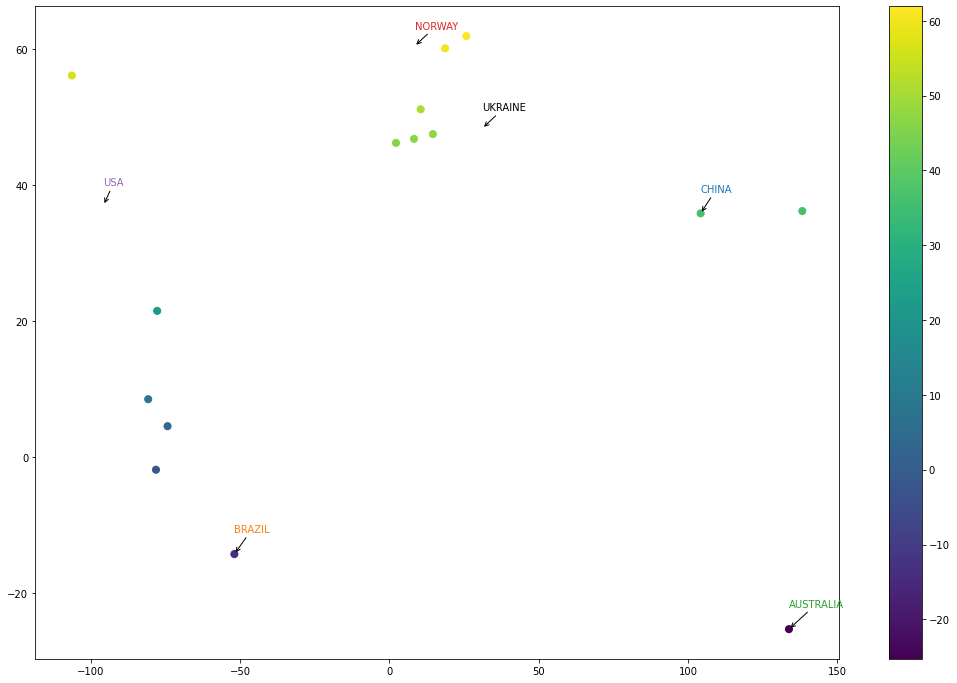

In [12]:
pltb.scatter(all_data.longitude, all_data.latitude, s=50, c=all_data.latitude)
pltb.colorbar()
ard = dict(arrowstyle="->")

plt.annotate('USA', xy = (-95.712891, 37.09024), 
               xytext = (-95.712891, 40), arrowprops = ard,color = 'tab:purple')
plt.annotate('UKRAINE', xy = (31.16558,48.379433), 
               xytext = (31.16558,51), arrowprops= ard)
plt.annotate('BRAZIL', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -11), arrowprops= ard, color = 'tab:orange')
plt.annotate('CHINA', xy = (104.195397, 35.86166), 
               xytext = (104.195397, 39), arrowprops= ard, color = 'tab:blue')
plt.annotate('AUSTRALIA', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -22), arrowprops= ard, color = 'tab:green')
plt.annotate('NORWAY', xy = (8.468946, 60.472024), 
               xytext = (8.468946, 63), arrowprops= ard, color = 'tab:red')

params = pltb.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )

pltb.savefig("Map of Science.png")